<a href="https://colab.research.google.com/github/Nzyimi/Student_Performance-Predictor/blob/main/Student_Perfomance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 1 Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set display options for clarty
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')


In [ ]:
# 2 Create  dataset
data = {
    'study_hours': [5, 10, 8, 12, 4, 15, 9, 7, 11, 13, 6, 14],
    'attendance': [60, 85, 70, 90, 55, 95, 80, 75, 88, 92, 65, 93],
    'previous_exam_score': [40, 65, 50, 70, 35, 80, 60, 55, 68, 75, 45, 78],
    'assignments_done': [5, 8, 6, 9, 4, 10, 7, 6, 8, 9, 5, 10],
    'final_score': [45, 70, 55, 78, 42, 85, 67, 58, 74, 80, 50, 82]
}

df = pd.DataFrame(data)

# Display th formated  dataset
print("Dataset Preview:")
df.head()

# Basic info and structure
df.info()

# Check for missing values
df.isnull().sum()




Dataset Preview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   study_hours          12 non-null     int64
 1   attendance           12 non-null     int64
 2   previous_exam_score  12 non-null     int64
 3   assignments_done     12 non-null     int64
 4   final_score          12 non-null     int64
dtypes: int64(5)
memory usage: 612.0 bytes


,0
study_hours,0
attendance,0
previous_exam_score,0
assignments_done,0
final_score,0


In [ ]:
## 3 Data Cleanig

# Checking for mising values
df.dropna(inplace=True)

# Checking for duplicats
df.drop_duplicates(inplace=True)

# Confirming data types
df.dtypes



,0
study_hours,int64
attendance,int64
previous_exam_score,int64
assignments_done,int64
final_score,int64


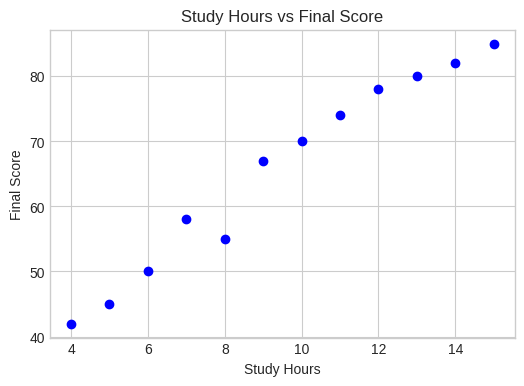

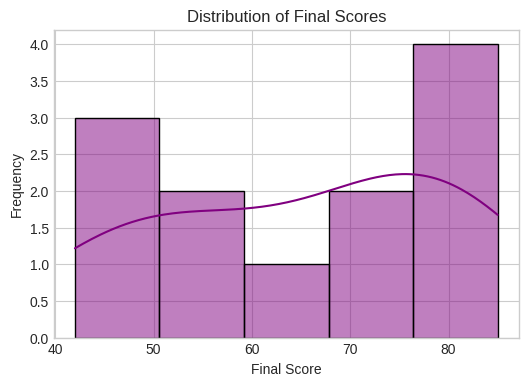

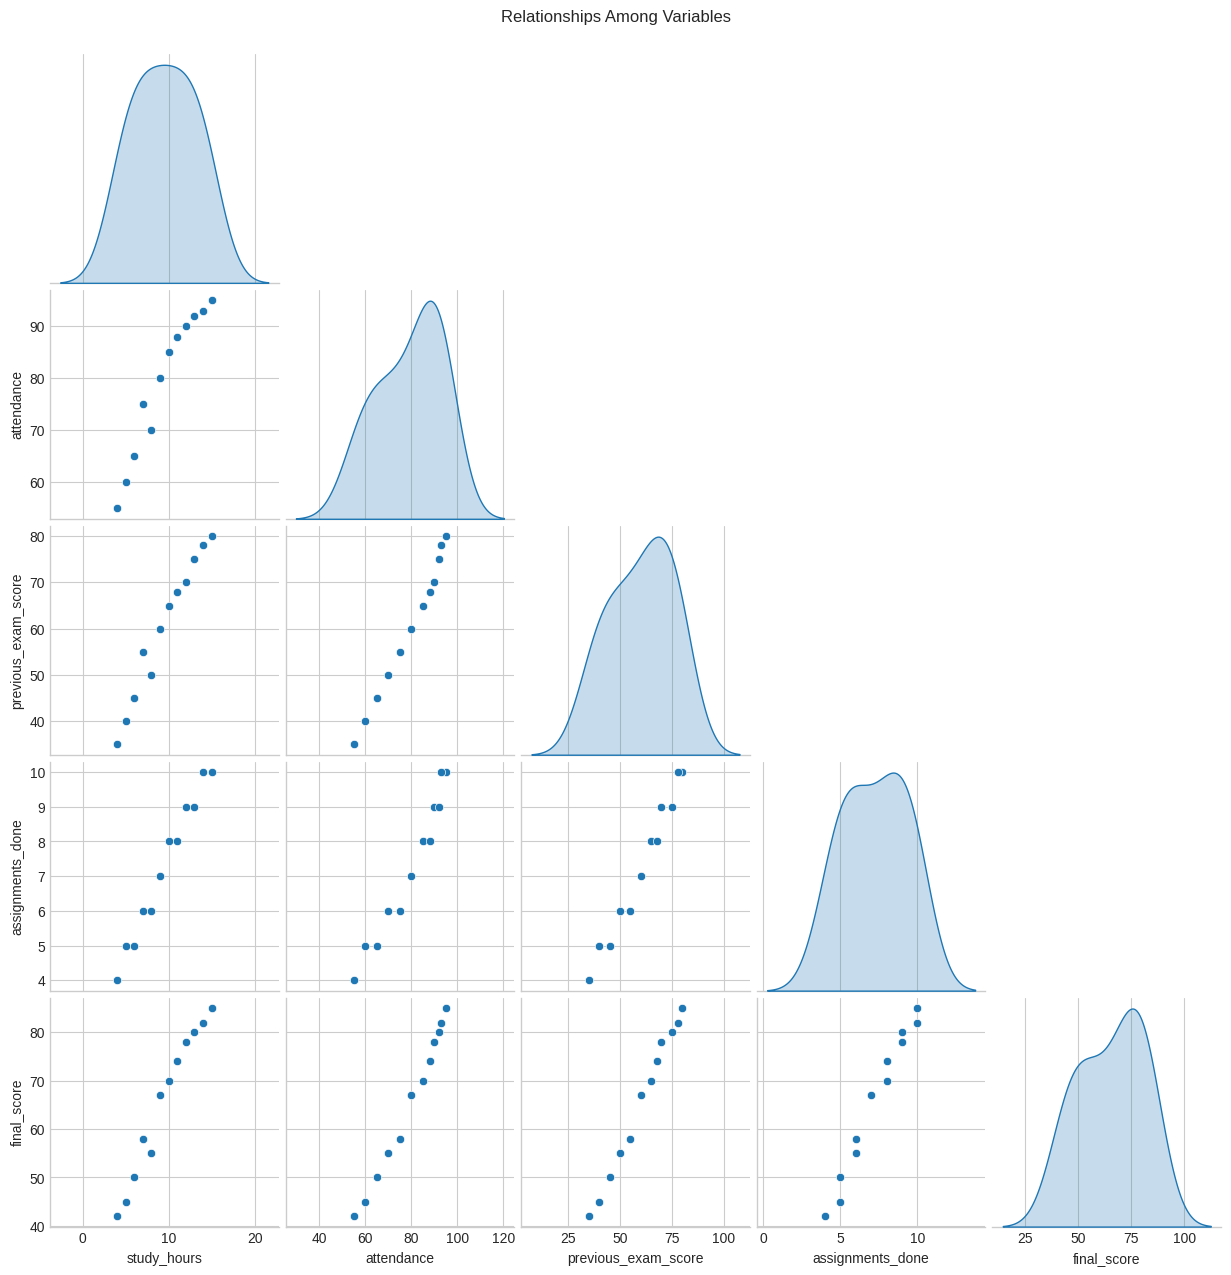

In [ ]:
## 4 Data Visualization

### **(a) Study Hours vs Fina Score**

plt.figure(figsize=(6,4))
plt.scatter(df['study_hours'], df['final_score'], color='blue')
plt.title('Study Hours vs Final Score')
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.show()


### **(b) Disribution of Final Scores**

plt.figure(figsize=(6,4))
sns.histplot(df['final_score'], kde=True, color='purple')
plt.title('Distribution of Final Scores')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.show()

### **(c)  Relatioships**

sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle('Relationships Among Variables', y=1.02)
plt.show()


In [ ]:
## *5 Model Training and Evalution**

# Splitin features and target
X = df[['study_hours', 'attendance', 'previous_exam_score', 'assignments_done']]
y = df['final_score']

# Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 1.00
Mean Absolute Error: 0.80
Mean Squared Error: 0.84


   Actual  Predicted
0      50  50.365301
1      80  79.391572
2      45  46.419064


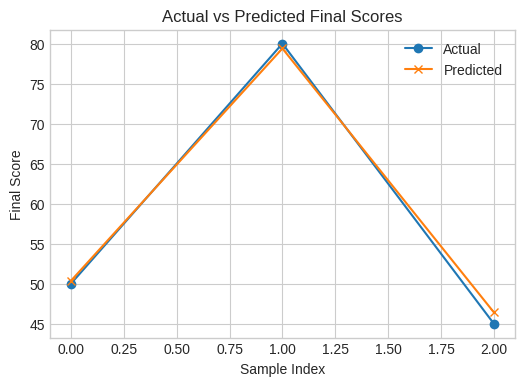

In [ ]:
## **56 Actual vs Predicted Comparison**

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.reset_index(drop=True, inplace=True)
print(comparison)

plt.figure(figsize=(6,4))
plt.plot(comparison['Actual'], label='Actual', marker='o')
plt.plot(comparison['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Final Scores')
plt.xlabel('Sample Index')
plt.ylabel('Final Score')
plt.legend()
plt.show()


In [ ]:
## 7 Interactive Prediction Tool

def predict_score(hours, attendance, prev_score, assignments):
    new_input = pd.DataFrame({
        'study_hours': [hours],
        'attendance': [attendance],
        'previous_exam_score': [prev_score],
        'assignments_done': [assignments]
    })
    predicted = model.predict(new_input)
    return predicted[0]

print("\n--- Prediction Tool ---")
study_hours = float(input("Enter number of study hours: "))
attendance = float(input("Enter attendance percentage: "))
prev_score = float(input("Enter previous exam score: "))
assignments = int(input("Enter number of assignments done: "))

predicted = predict_score(study_hours, attendance, prev_score, assignments)
print(f"Predicted Final Score: {predicted:.2f}")



--- Prediction Tool ---


In [ ]:
## **8 Conclusion**

## This project successfully demonstrates how data analysis and machine learning can be applied to predict student performance based on study and participation metrics. The results show a clear positive relationship  between effort-related factors (study hours, attendance, assignments) and final academic outcomes.##
